In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [3]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    if particle : 
        data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)
        pcl_indx_at_t = np.where(np.isclose(int(ds.current_time.in_cgs()),data[:,1]))[0]
        print "Number of sink particles: " , len(pcl_indx_at_t)
        pcl_pos_at_t = data[pcl_indx_at_t,2:5]
        for pos in pcl_pos_at_t:
            slc.annotate_marker(pos, coord_system='data',marker='.',plot_args={'color':'black','s':3})
    slc.show()

In [5]:
# G = 6.67e-8 #cgs
# c_s = 28730.5 #cm/s

# xi_range = np.logspace(-1.5,1.5,num=30)
# tlst = [0,28,30,32,34,36,38,40]
# hsv = plt.get_cmap('rainbow_r')
# colors = hsv(np.linspace(0, 1.0, len(tlst)))
# for s , c in zip(tlst,colors):
#     data = np.loadtxt("2fast_sum_args_list{}_lev7.txt".format(s))
#     plt.loglog(xi_range[::-1],4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
    
# min_cell_size =  1e19/2**(9)*1.057E-17
# plt.axvline(min_cell_size,c="red")
# plt.axvline(4e18*1.057E-17,c="red")
# plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5))
# plt.xlabel(r"log $\xi$",fontsize=16)
# plt.ylabel(r"log m/$\xi$",fontsize=16)
# plt.title("Hi-res no sink",fontsize=16)

# plt.xlim(0.05,100)

### Computing $\Omega$

$$\Omega = \sqrt{\frac{3GM\beta}{R^3}}$$

#### What's M? 

$$ M  =  \int \rho 4\pi r^2 dr$$
where $\rho$ is given by the Lane-Emden profile

$$\xi_{max}  = 16.90$$

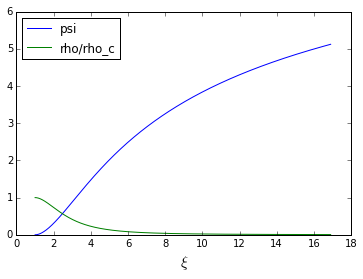

In [18]:
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1, 16.90, 0.01)
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
plt.plot(xi,asol[:,0],label ='psi')#$\psi$' )
plt.plot(xi,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel(r"$\xi$",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [19]:
fattening_factor = 100
rho_c = 1.1E-19*fattening_factor

In [20]:
dr = 0.01/1.057E-17

In [21]:
density =  rho_c*rho

In [22]:
r = xi/1.057E-17

In [23]:
M = sum((4*pi*r**2)*density*dr)
print "Total mass M = ", M,"g" 

Total mass M =  4.53382324263e+36 g


In [24]:
print 4/3.*pi*(max(r)**3)*rho_c

1.87994559562e+38


$$\Omega = \sqrt{\frac{3GM\beta}{R^3}}$$

In [10]:
def compute_omega(beta):
    M =  4.53382324263e+36
    G= 6.67e-8
    rmax = 16.9
    return sqrt(3*G*M*beta/(rmax/1.057e-17)**3)

In [11]:
compute_omega(1)

4.7112728913568037e-13

In [25]:
3*G*M/(rmax/1.057e-17)**3

2.2196092256855046e-25

#### In theory $\beta>1/3$ should get blown apart. This is results from our $\beta=1$ model 

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



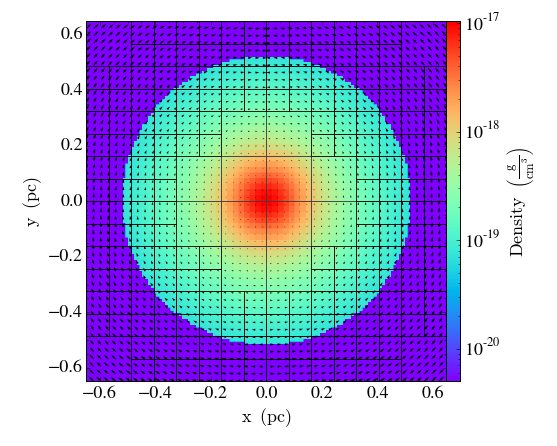

In [4]:
plot_dens(0,grid=True,velocity=True)


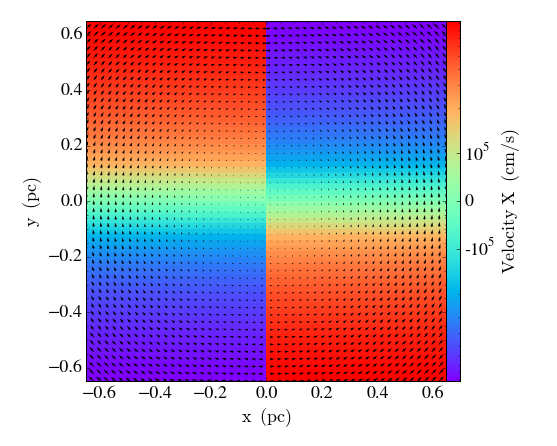

In [8]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="velocity_x"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()

blows up at the first timestep ,as expected...

#### In theory $\beta=1/3$ should be at the critical point. This is results from our $\beta=1/3$ model 


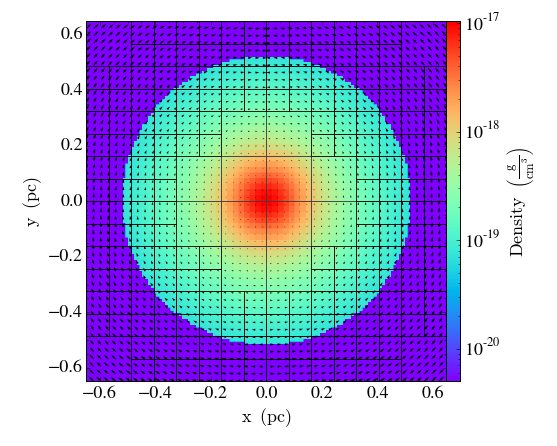

In [10]:
plot_dens(0,grid=True,velocity=True)


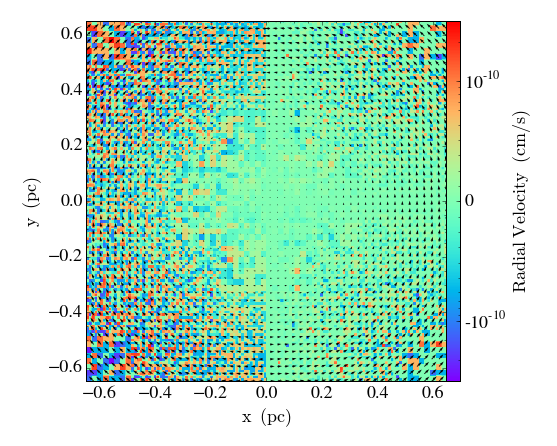

In [14]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="radial_velocity"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()

In [32]:
compute_omega(0.3)

2.5804704371587073e-13

### $\beta = 0.1 $


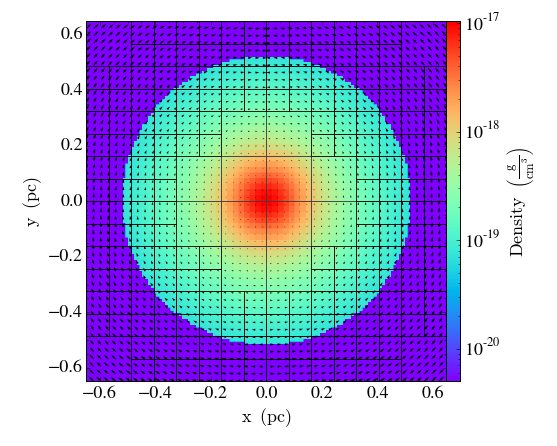

In [33]:
plot_dens(0,grid=True,velocity=True)


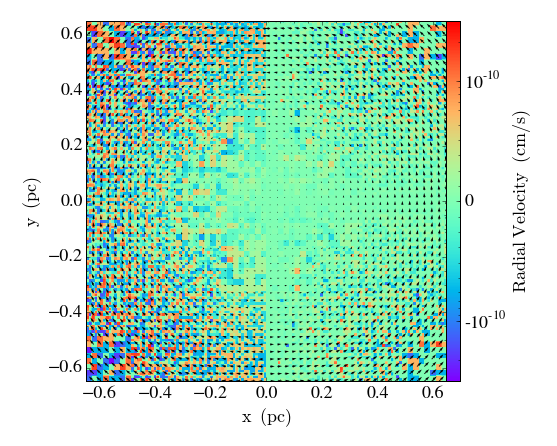

In [38]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="radial_velocity"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()


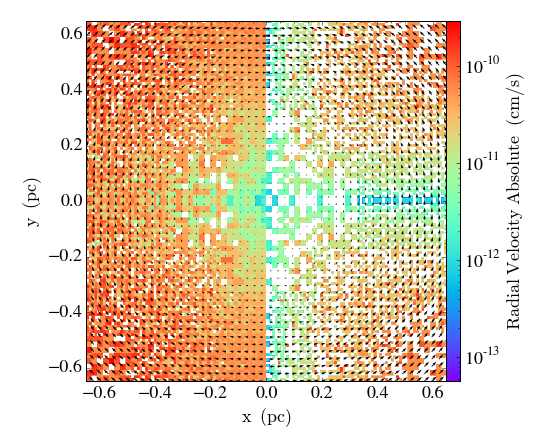

In [37]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="radial_velocity_absolute"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
# if grid: slc.annotate_grids()
slc.annotate_velocity()
slc.set_cmap("all","rainbow")
slc.show()

#### $\beta=0$: no rotation at all t=58 


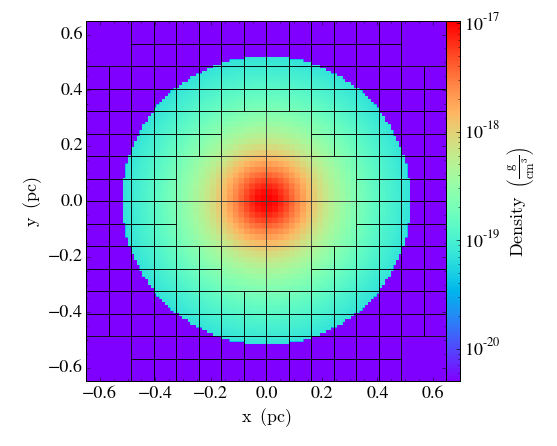


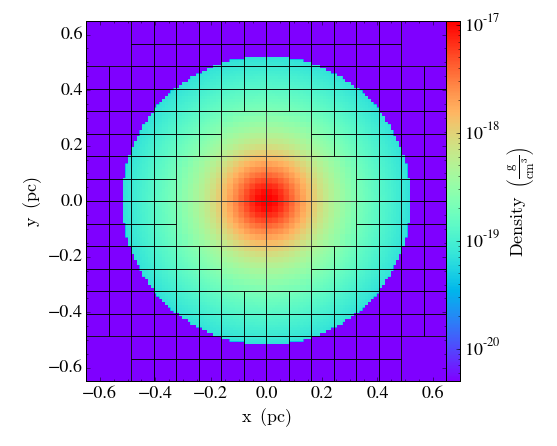


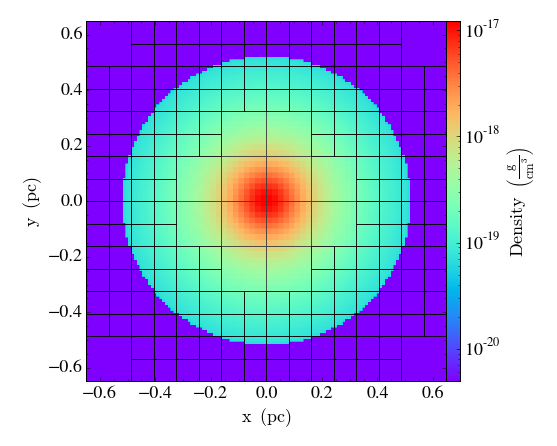


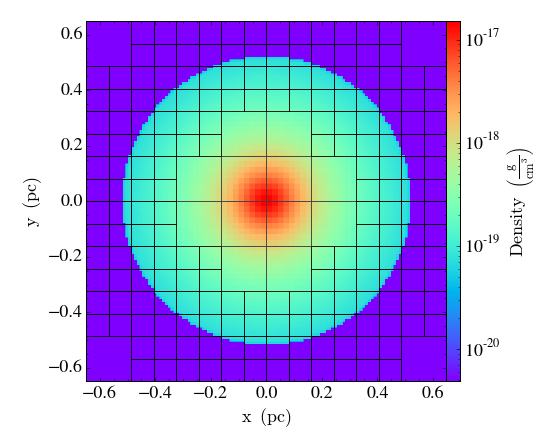


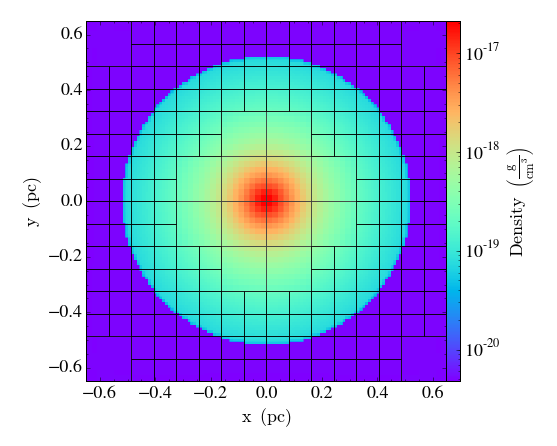


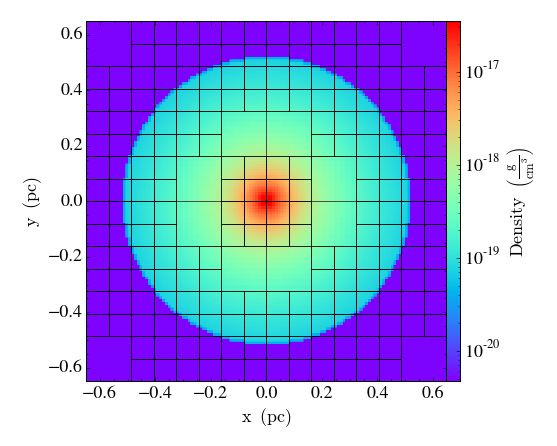


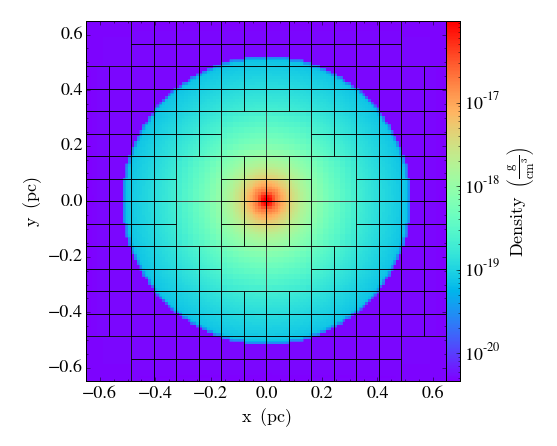


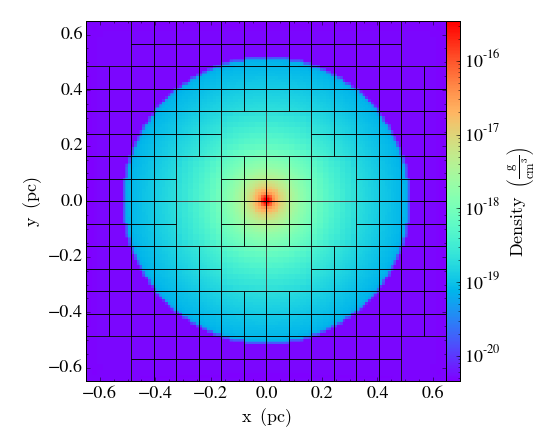


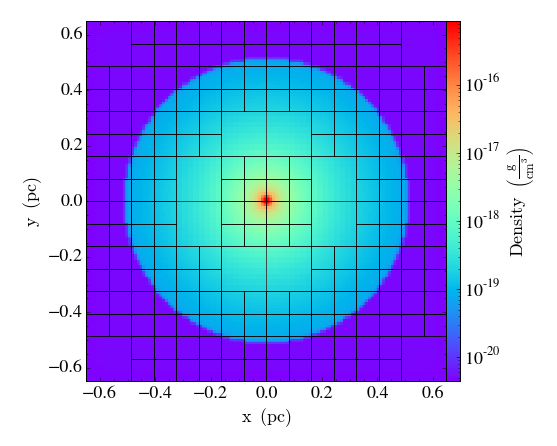


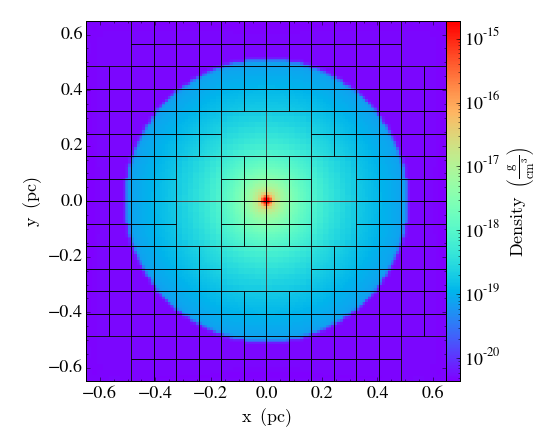


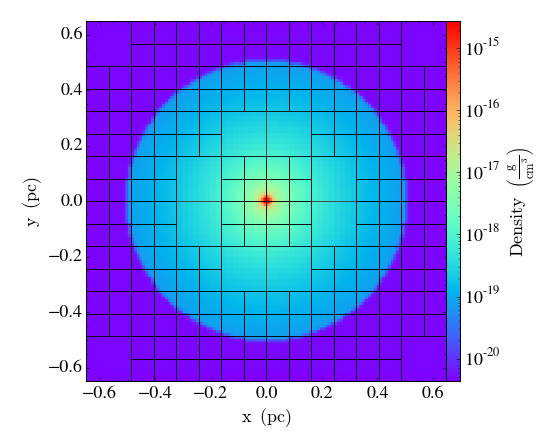


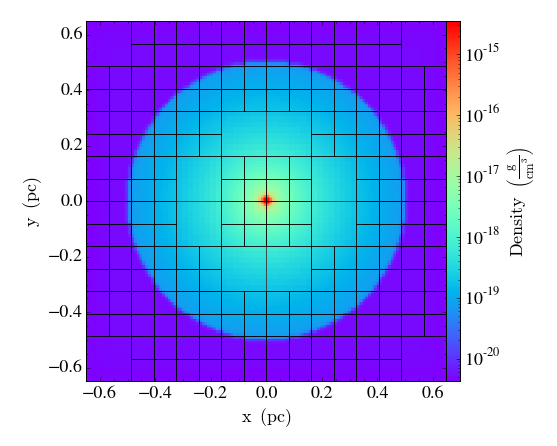

In [39]:
END_TIME = 59
for i in np.arange(END_TIME):
    if i%5==0:
        plot_dens(i,grid=True)

### $\beta = 1e-3$: ran till only 42


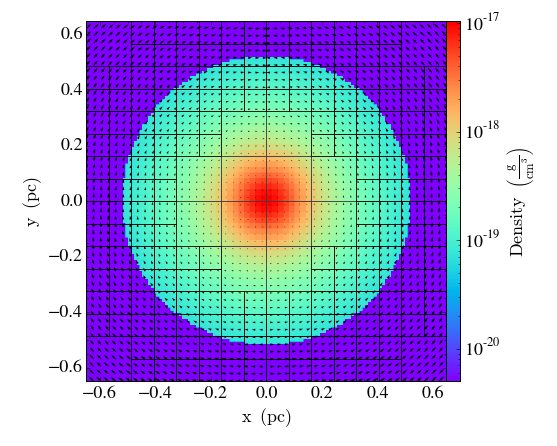


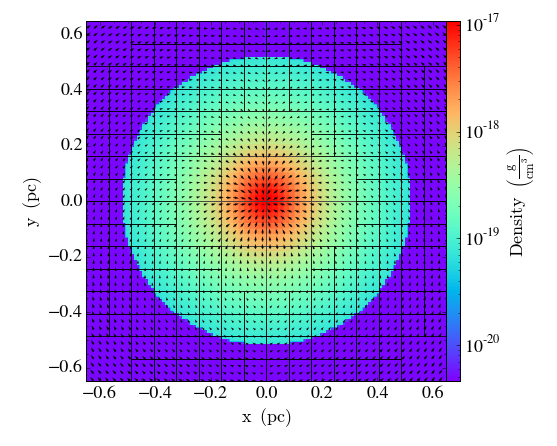


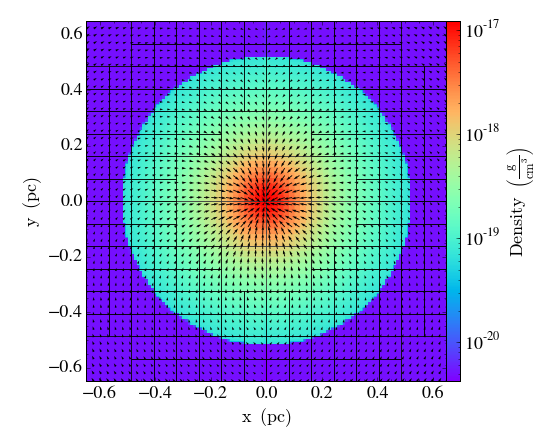


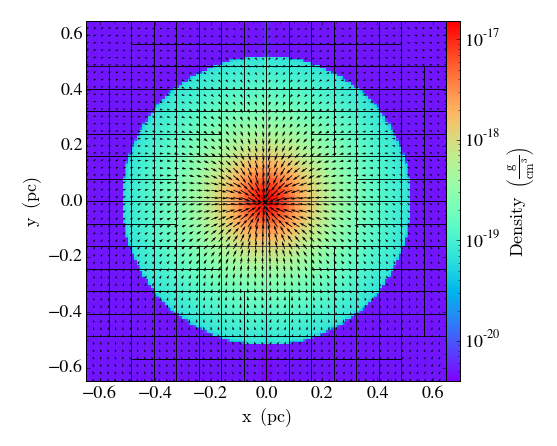


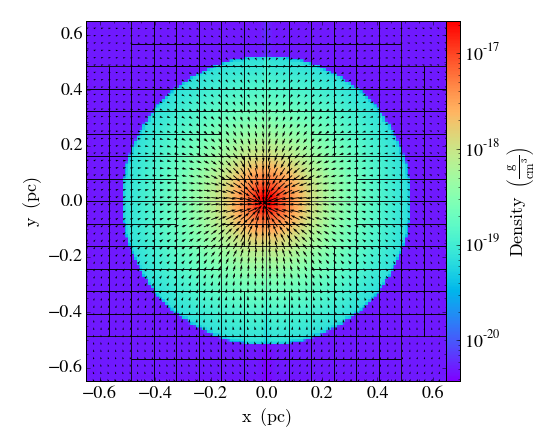


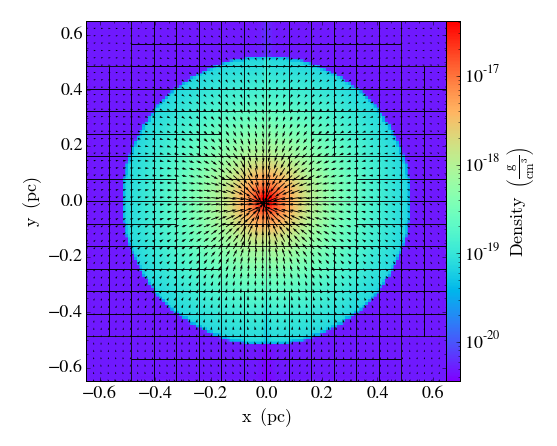


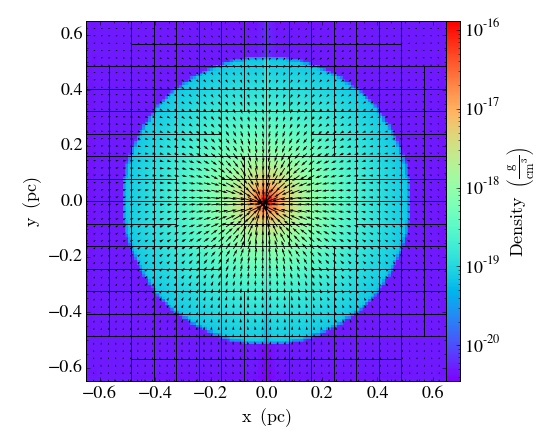


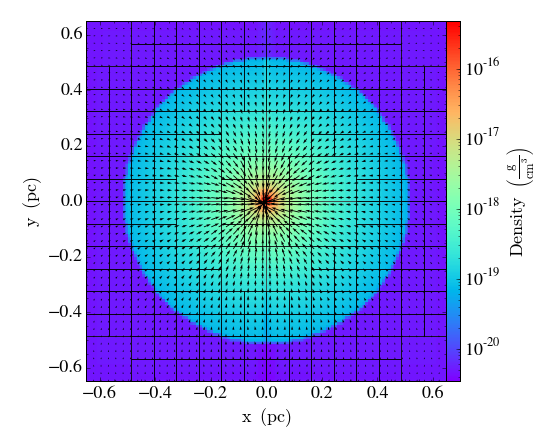


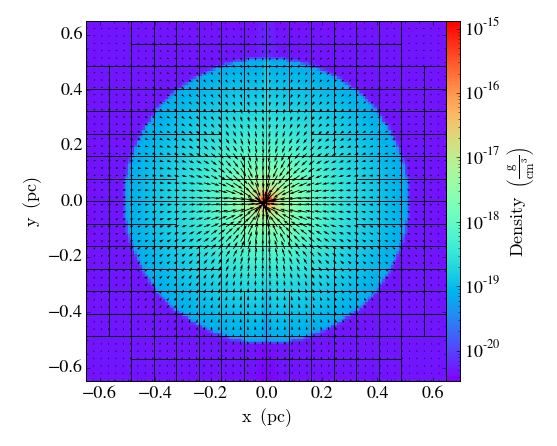

In [9]:
END_TIME = 42
for i in np.arange(END_TIME):
    if i%5==0:
        plot_dens(i,grid=True,velocity=True)

In [22]:
def plot_omega(i,velocity=False,grid=False,zmin ="",zmax="",particle=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="omega"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



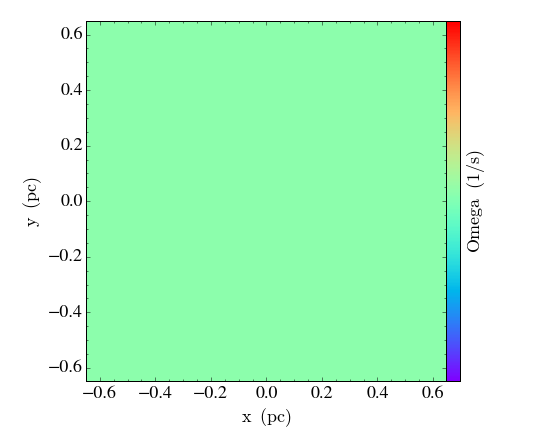


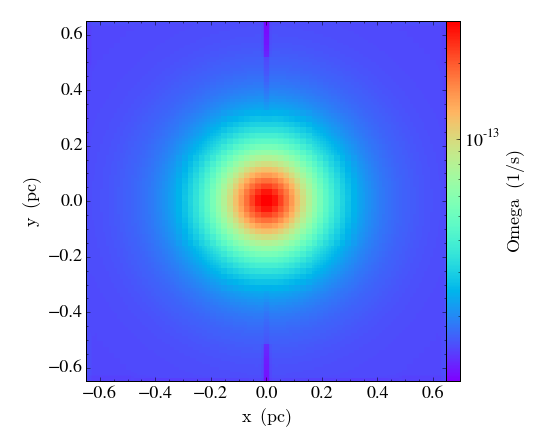


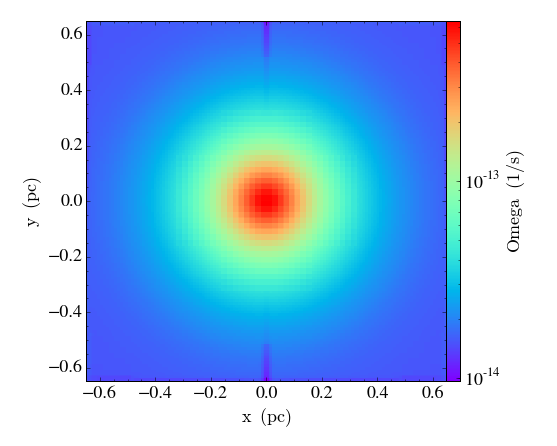


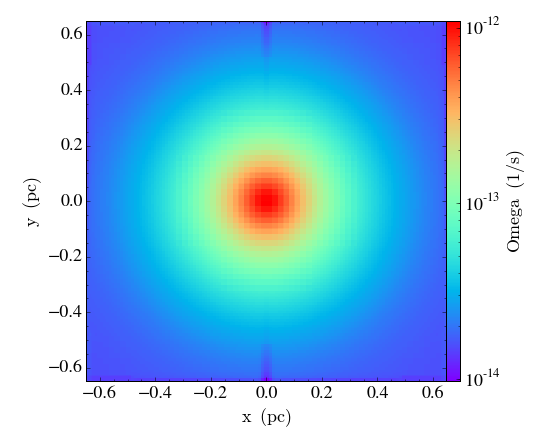


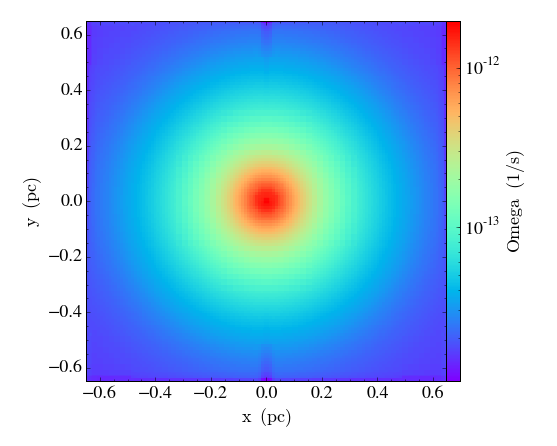


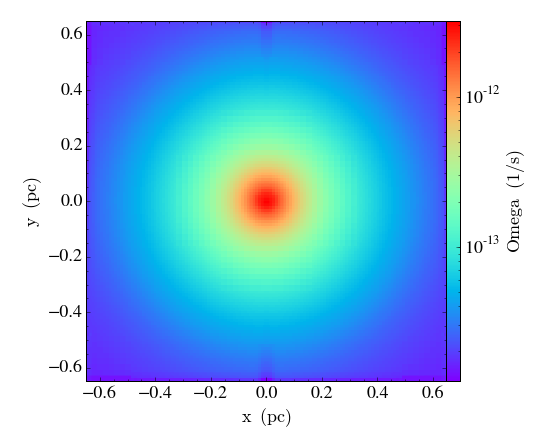


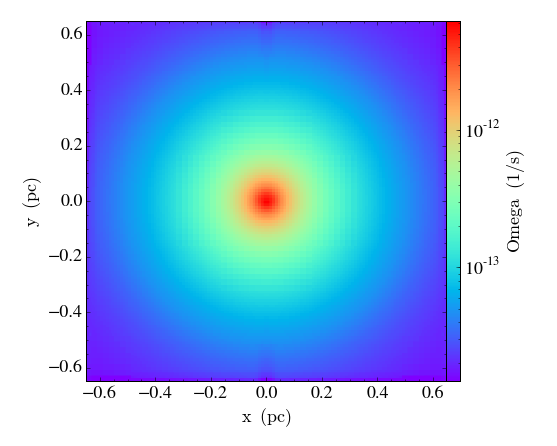


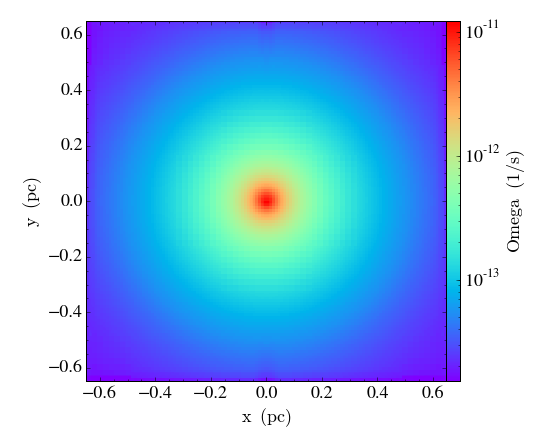


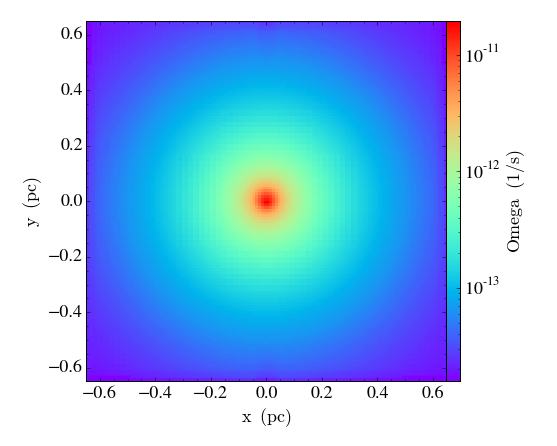

In [23]:
END_TIME = 42
for i in np.arange(END_TIME):
    if i%5==0:
        plot_omega(i)

In [13]:
compute_omega(0.01)

4.711272891356804e-14

In [16]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
data = ds.all_data()
data["omega"]

YTArray([  1.48983221e-14,   1.48983221e-14,   1.48983221e-14, ...,
         1.48983221e-14,   1.48983221e-14,   1.48983221e-14]) 1/s

In [21]:
np.mean(data["omega"])

1.48983220532e-14 1/s

### I suspect that the missing factor of 3-ish comes from the fact that M is different in the actual simulation because of initialization and we use that to compute the factor in Omega

### Also should the whole box be spinning or just the sphere, it seems unphysical to have just the sphere spinning but the densities are so different on inside and outside , not sure if rotation should be on outside too?

----------------------------------------------------------------------------------------------------------------------

In [4]:
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
ctr= 2e18*cm


def _r(field,data):
    r = sqrt((data["x"]-ctr)**2+(data["y"]-ctr)**2+(data["z"]-ctr)**2)
    return r
# def _v_mag(field,data):
#     return sqrt(data['velocity_x']**2+data['velocity_y']**2+data['velocity_z']**2)
def _omega(field,data):
    return sqrt(data['velocity_x']**2+data['velocity_y']**2+data['velocity_z']**2)/data["r"]
yt.add_field("r",function= _r,units="cm")
# yt.add_field("v_mag",function= _v_mag,units="cm/second")
yt.add_field("omega",function= _omega,units="1/s")

In [5]:
i=0
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
data = ds.all_data()

In [6]:
print data["r"]
# print data["v_mag"]
print data["omega"]

[  3.40997503e+18   3.37427654e+18   3.33936629e+18 ...,   3.33936629e+18
   3.37427654e+18   3.40997503e+18] cm
[  1.48981290e-14   1.48982895e-14   1.48982809e-14 ...,   1.48982809e-14
   1.48982896e-14   1.48981290e-14] 1/s
